# **Games**

**1. 지역에 따라서 선호하는 게임 장르가 다른가?**

1) 지역에 따라서 선호하는 게임 장르가 다른지

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2_project.csv')
df.dropna(inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [57]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [58]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [59]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [60]:
df1.columns = ['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']
fit = ols(formula='NA_Sales ~ C(Genre)', data=df1).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,167.365826,15.215075,22.825903,4.036139e-47
Residual,16279.0,10851.102236,0.666571,NaN,NaN


In [61]:
df1.columns = ['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']
fit = ols(formula='EU_Sales ~ C(Genre)', data=df1).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,41.134892,3.739536,14.548673,1.863291e-28
Residual,16279.0,4184.292200,0.257036,NaN,NaN


In [146]:
df1.columns = ['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']
fit = ols(formula='JP_Sales ~ C(Genre)', data=df1).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,53.123230,4.829385,51.337152,5.066459e-112
Residual,16279.0,1531.396806,0.094072,NaN,NaN


In [147]:
df1.columns = ['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']
fit = ols(formula='Other_Sales ~ C(Genre)', data=df1).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,4.938318,0.448938,12.521786,6.045016e-24
Residual,16279.0,583.643728,0.035853,NaN,NaN


2) 지역에 따라서 선호하는 게임 장르가 어떻게 다른지

In [70]:
df1_tidy = df1.melt(id_vars = 'Genre')
df1_tidy = df1_tidy.rename(
    columns = {'variable':'Feature'}
)
df1_tidy


df1.sort_values('Genre')

df1[df1['Genre'] == 'Action']

df1[df1['Genre'] == 'Action'].shape

df2 = df[['Genre']]
df2
df3 = df2.drop_duplicates()
print(df3)

          Genre
0        Action
2     Adventure
3          Misc
4      Platform
5        Sports
6    Simulation
10       Racing
12  RolePlaying
13       Puzzle
16     Strategy
24     Fighting
27      Shooter


3) 표를 만들어보자

In [168]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]
NA_SalesT = df['NA_Sales'].sum()
print(NA_SalesT)

EU_SalesT = df['EU_Sales'].sum()
print(EU_SalesT)

JP_SalesT = df['JP_Sales'].sum()
print(JP_SalesT)

Other_SalesT = df['Other_Sales'].sum()
print(Other_SalesT)

4327.65
2406.81
1284.15
788.9100000000001


In [41]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Action = df1['Genre'] == 'Action'
df1 = df[Action]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

858.76
513.69
156.60000000000002
184.56


In [42]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Adventure = df1['Genre'] == 'Adventure'
df1 = df[Adventure]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

102.45000000000002
64.93
51.85000000000001
16.86


In [43]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Misc = df1['Genre'] == 'Misc'
df1 = df[Misc]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

403.5
215.23000000000002
109.47
74.43


In [44]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Platform = df1['Genre'] == 'Platform'
df1 = df[Platform]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

445.9
200.64
130.64999999999998
51.5


In [45]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Sports = df1['Genre'] == 'Sports'
df1 = df[Sports]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

669.36
371.13
134.76000000000002
132.61


In [46]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Simulation = df1['Genre'] == 'Simulation'
df1 = df[Simulation]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

181.46
112.99000000000001
63.54
31.32


In [47]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Racing = df1['Genre'] == 'Racing'
df1 = df[Racing]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

354.92999999999995
235.18
56.32
76.54


In [71]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

RolePlaying = df1['Genre'] == 'RolePlaying'
df1 = df[RolePlaying]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

326.5
187.57
350.28999999999996
59.38


In [51]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Puzzle = df1['Genre'] == 'Puzzle'
df1 = df[Puzzle]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

121.74000000000001
50.47
56.239999999999995
12.450000000000001


In [72]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Strategy = df1['Genre'] == 'Strategy'
df1 = df[Strategy]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

67.83
44.75
49.099999999999994
11.21


In [73]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Fighting = df1['Genre'] == 'Fighting'
df1 = df[Fighting]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

220.73999999999998
100.0
87.15
36.19


In [74]:
df1 = df[['Genre','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

Shooter = df1['Genre'] == 'Shooter'
df1 = df[Shooter]
df1

NA_Sales1 = df1['NA_Sales'].sum()
print(NA_Sales1)

EU_Sales1 = df1['EU_Sales'].sum()
print(EU_Sales1)

JP_Sales1 = df1['JP_Sales'].sum()
print(JP_Sales1)

Other_Sales1 = df1['Other_Sales'].sum()
print(Other_Sales1)

574.48
310.23
38.18000000000001
101.86


In [3]:
region_df = pd.DataFrame({'Genre':['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','RolePlaying','Puzzle','Strategy','Fighting','Shooter'], 
                          'NA_Sales':['858.76',	'102.45',	'403.5',	'445.9',	'669.36',	'181.46',	'354.93',	'326.5',	'121.74',	'67.83',	'220.74',	'574.48'],
                          'EU_Sales':['513.69',	'64.93',	'215.23',	'200.64',	'371.13',	'112.99',	'235.18',	'187.57',	'50.47',	'44.75',	'100',	'310.23'],
                          'JP_Sales':['156.6',	'51.85',	'109.47',	'130.65',	'134.76',	'63.54',	'56.32',	'350.29',	'56.24',	'49.1',	'87.15',	'38.18'],
                          'Other_Sales':['184.56',	'16.86',	'74.43',	'51.5',	'132.61',	'31.32',	'76.54',	'59.38',	'12.45',	'11.21',	'36.19',	'101.86'],
                           })
region_df


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.76,513.69,156.6,184.56
1,Adventure,102.45,64.93,51.85,16.86
2,Misc,403.5,215.23,109.47,74.43
3,Platform,445.9,200.64,130.65,51.5
4,Sports,669.36,371.13,134.76,132.61
5,Simulation,181.46,112.99,63.54,31.32
6,Racing,354.93,235.18,56.32,76.54
7,RolePlaying,326.5,187.57,350.29,59.38
8,Puzzle,121.74,50.47,56.24,12.45
9,Strategy,67.83,44.75,49.1,11.21


In [ ]:
#Multi Index(다중인덱스)
#region_df = pd.DataFrame({'Genre':['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','RolePlaying','Puzzle','Strategy','Fighting','Shooter'], 
#                          'NA_Sales':['858.76',	'102.45',	'403.5',	'445.9',	'669.36',	'181.46',	'354.93',	'326.5',	'121.74',	'67.83',	'220.74',	'574.48'],
#                          'EU_Sales':['513.69',	'64.93',	'215.23',	'200.64',	'371.13',	'112.99',	'235.18',	'187.57',	'50.47',	'44.75',	'100',	'310.23'],
#                          'JP_Sales':['156.6',	'51.85',	'109.47',	'130.65',	'134.76',	'63.54',	'56.32',	'350.29',	'56.24',	'49.1',	'87.15',	'38.18']},
#                         column = pd.MultiColumn.from_tuples


In [ ]:
#북미출고율: Action - Sports - Shooter - Platform - Misc
#유럽출고율: Action - Sports - Shooter - Racing - Misc
#일본출고율: Role Playing - Action - Sports - Platform - Misc
#나머지출고율: Action - Sports - Shooter - Misc - Role Playing

In [115]:
#NA_Sales = [858.76,	102.45,	403.5,	445.9,	669.36,	181.46,	354.93,	326.5,	121.74,	67.83,	220.74,	574.48]
#plt.bar(range(len(NA_Sales)),NA_Sales)
#plt.show()

In [116]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams['axes.grid'] = True 

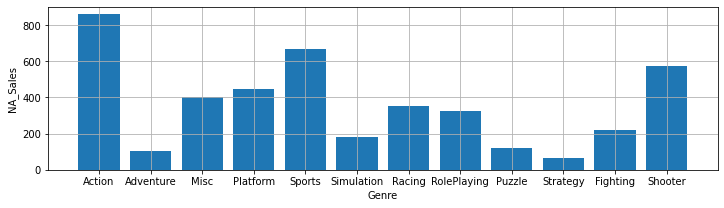

In [117]:
NA_Sales = [858.76,	102.45,	403.5,	445.9,	669.36,	181.46,	354.93,	326.5,	121.74,	67.83,	220.74,	574.48]

plt.figure(figsize=(12, 3))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','RolePlaying','Puzzle','Strategy','Fighting','Shooter'])
plt.xlabel('Genre')
plt.ylabel('NA_Sales')
plt.bar(range(len(NA_Sales)),NA_Sales)

plt.show()

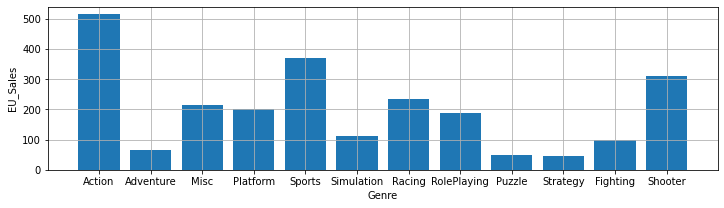

In [118]:
EU_Sales = [513.69,	64.93,	215.23,	200.64,	371.13,	112.99,	235.18,	187.57,	50.47,	44.75,	100,	310.23]

plt.figure(figsize=(12, 3))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','RolePlaying','Puzzle','Strategy','Fighting','Shooter'])
plt.xlabel('Genre')
plt.ylabel('EU_Sales')
plt.bar(range(len(EU_Sales)),EU_Sales)

plt.show()

<BarContainer object of 12 artists>

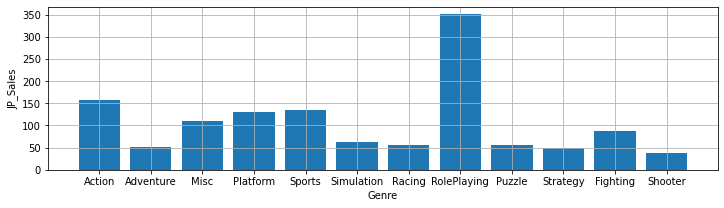

In [119]:
JP_Sales = [156.6,	51.85,	109.47,	130.65,	134.76,	63.54,	56.32,	350.29,	56.24,	49.1,	87.15,	38.18]
          
plt.figure(figsize=(12, 3))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','RolePlaying','Pu ㄲㅁzzle','Strategy','Fighting','Shooter'])
plt.xlabel('Genre')
plt.ylabel('JP_Sales')
plt.bar(range(len(JP_Sales)),JP_Sales)


<BarContainer object of 12 artists>

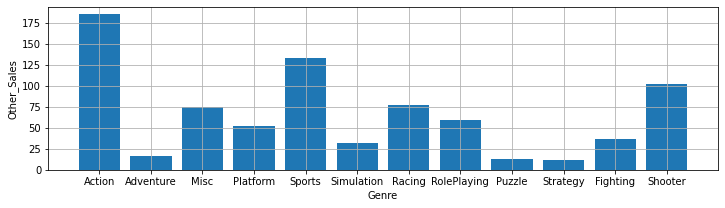

In [120]:
Other_Sales = [184.56,	16.86,	74.43,	51.5,	132.61,	31.32,	76.54,	59.38,	12.45,	11.21,	36.19,	101.86]
                         
plt.figure(figsize=(12, 3))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','RolePlaying','Puzzle','Strategy','Fighting','Shooter'])
plt.xlabel('Genre')
plt.ylabel('Other_Sales')
plt.bar(range(len(Other_Sales)),Other_Sales)


**2. 연도별 게임의 트렌드가 있는가?**

1) 연도별 게임의 트렌드가 있는가?

In [4]:
small_df = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [113]:
small_df['Year_band'] = 0
small_df.loc[small_df['Year']<1990, 'Year_band'] = '1980s'
small_df.loc[(small_df['Year']>=1990) & (small_df['Year']<2000), 'Year_band'] = '1990s'
small_df.loc[(small_df['Year']>=2000) & (small_df['Year']<2010), 'Year_band'] = '2000s'
small_df.loc[(small_df['Year']>=2010) & (small_df['Year']<2020), 'Year_band'] = '2010s'
small_df.loc[(small_df['Year']>=2020) & (small_df['Year']<2030), 'Year_band'] = '2020s'
small_df.head()
small_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,2000s,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2000s,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010s,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010s,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010s,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,2000s,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,2000s,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,2010s,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,2010s,0.38


In [114]:
small_df['Year_band'] = 0
small_df.loc[small_df['Year']<1990, 'Year_band'] = '팔십년대'
small_df.loc[(small_df['Year']>=1990) & (small_df['Year']<2000), 'Year_band'] = '구십년대'
small_df.loc[(small_df['Year']>=2000) & (small_df['Year']<2010), 'Year_band'] = '이천년대'
small_df.loc[(small_df['Year']>=2010) & (small_df['Year']<2020), 'Year_band'] = '이천십년대'
small_df.loc[(small_df['Year']>=2020) & (small_df['Year']<2030), 'Year_band'] = '이천이십년대'
small_df.head()
small_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,이천년대,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,이천년대,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,이천십년대,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,이천십년대,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,이천십년대,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,이천년대,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,이천년대,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,이천십년대,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,이천십년대,0.38


In [115]:
small_df.Year_band.value_counts().to_frame().style.background_gradient(cmap='summer')

,Year_band
이천년대,9182
이천십년대,5133
구십년대,1770
팔십년대,205
이천이십년대,1


In [123]:
obs1 = pd.crosstab(small_df['Year_band'], small_df['Genre'])
obs1

from scipy.stats import chi2_contingency
print(chi2_contingency(obs1, correction = False)) 

(1053.11414753981, 6.0092289111075e-192, 44, array([[3.52239887e+02, 1.38744706e+02, 9.08305199e+01, 1.85355104e+02,
        9.49591799e+01, 6.17126021e+01, 1.32551716e+02, 1.59713952e+02,
        1.39070653e+02, 9.20256583e+01, 2.50109877e+02, 7.26861457e+01],
       [1.82726929e+03, 7.19747959e+02, 4.71189737e+02, 9.61542692e+02,
        4.92607452e+02, 3.20138481e+02, 6.87621386e+02, 8.28527408e+02,
        7.21438831e+02, 4.77389602e+02, 1.29746265e+03, 3.77064514e+02],
       [1.02149567e+03, 4.02359646e+02, 2.63408508e+02, 5.37529802e+02,
        2.75381622e+02, 1.78966546e+02, 3.84399975e+02, 4.63170462e+02,
        4.03304892e+02, 2.66874409e+02, 7.25318642e+02, 2.10789823e+02],
       [1.99005586e-01, 7.83868394e-02, 5.13166779e-02, 1.04720398e-01,
        5.36492542e-02, 3.48658769e-02, 7.48879750e-02, 9.02338715e-02,
        7.85709901e-02, 5.19918974e-02, 1.41305015e-01, 4.10656191e-02],
       [4.07961451e+01, 1.60693021e+01, 1.05199190e+01, 2.14676815e+01,
        1.09980

In [45]:
# pvalue가 0.05수준에서 유의하다 / 연도별 게임트렌드가 있다

In [154]:
small_df1 = small_df[['Year_band','Genre']]
small_df1

,Year_band,Genre
0,이천년대,Action
1,이천년대,Action
2,이천십년대,Adventure
3,이천십년대,Misc
4,이천십년대,Platform
...,...,...
16593,이천년대,Platform
16594,이천년대,Action
16595,이천십년대,Sports
16596,이천십년대,Action


In [161]:
small_df1 = small_df[['Year_band','Genre']]

#팔십년대 = small_df1['Year_band'] == '팔십년대'
#small_df1 = small_df1[팔십년대]
#small_df1

small_df2 = pd.crosstab(small_df1.Year_band, small_df1.Genre, margins=True)
small_df2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,RolePlaying,Shooter,Simulation,Sports,Strategy,All
Year_band,,,,,,,,,,,,,
구십년대,161,98,193,118,125,71,182,172,137,86,303,124,1770
이천년대,1581,635,442,1011,566,363,797,732,718,552,1407,378,9182
이천십년대,1434,542,197,568,150,115,233,557,395,205,570,167,5133
이천이십년대,0,0,0,0,0,0,0,0,0,1,0,0,1
팔십년대,66,2,4,9,33,19,8,9,30,3,22,0,205
All,3242,1277,836,1706,874,568,1220,1470,1280,847,2302,669,16291


In [163]:
small_df3 = small_df2.reindex(index=['팔십년대','구십년대', '이천년대','이천십년대','이천이십년대'])
small_df3

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,RolePlaying,Shooter,Simulation,Sports,Strategy,All
Year_band,,,,,,,,,,,,,
팔십년대,66,2,4,9,33,19,8,9,30,3,22,0,205
구십년대,161,98,193,118,125,71,182,172,137,86,303,124,1770
이천년대,1581,635,442,1011,566,363,797,732,718,552,1407,378,9182
이천십년대,1434,542,197,568,150,115,233,557,395,205,570,167,5133
이천이십년대,0,0,0,0,0,0,0,0,0,1,0,0,1


In [127]:
obs1 = pd.crosstab(small_df['Year_band'], small_df['Platform'])
obs1
from scipy.stats import chi2_contingency
print(chi2_contingency(obs1, correction = False)) 

(33545.29167956371, 0.0, 124, array([[1.26032779e+01, 3.25946842e-01, 5.42158247e+01, 1.08648947e-01,
        5.64974526e+00, 2.31530907e+02, 1.05389479e+01, 8.53980726e+01,
        5.88877294e+01, 2.93352158e+00, 1.08648947e-01, 3.43330673e+01,
        1.06475968e+01, 1.30378737e+00, 1.01912713e+02, 1.08648947e-01,
        1.29074949e+02, 2.31096311e+02, 1.41678227e+02, 3.65060463e+01,
        1.30052790e+02, 4.45460684e+01, 1.87962679e+01, 6.51893684e-01,
        2.59670984e+01, 2.17297895e-01, 6.51893684e-01, 1.40157142e+02,
        1.55367995e+01, 1.34072801e+02, 8.72451047e+01, 2.31422258e+01],
       [6.53803941e+01, 1.69087226e+00, 2.81248419e+02, 5.63624087e-01,
        2.93084525e+01, 1.20108293e+03, 5.46715364e+01, 4.43008532e+02,
        3.05484255e+02, 1.52178503e+01, 5.63624087e-01, 1.78105211e+02,
        5.52351605e+01, 6.76348904e+00, 5.28679394e+02, 5.63624087e-01,
        6.69585415e+02, 1.19882843e+03, 7.34965809e+02, 1.89377693e+02,
        6.74658032e+02, 2.3108587

In [126]:

small_df1 = small_df[['Year_band','Platform']]
small_df1

small_df2 = pd.crosstab(small_df1.Year_band, small_df1.Platform, margins=True)
small_df2

small_df3 = small_df2.reindex(index=['팔십년대','구십년대', '이천년대','이천십년대','이천이십년대'])
small_df3

Platform,2600,3DO,3DS,989 Studios,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
Year_band,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
팔십년대,116,0,0,0,0,1,11,0,0,0,0,0,75,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205
구십년대,0,3,0,1,21,0,59,0,0,27,1,246,23,12,39,1,915,0,0,0,0,0,173,6,239,2,2,0,0,0,0,0,1770
이천년대,0,0,0,0,31,1617,27,786,542,0,0,70,0,0,441,0,273,2082,418,0,697,0,0,0,0,0,4,838,0,553,803,0,9182
이천십년대,0,0,499,0,0,512,0,0,0,0,0,0,0,0,456,0,0,45,886,336,500,410,0,0,0,0,0,452,143,681,0,213,5133
이천이십년대,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [125]:
obs1 = pd.crosstab(small_df['Year_band'], small_df['Publisher'])
obs1
from scipy.stats import chi2_contingency
print(chi2_contingency(obs1, correction = False)) 

small_df1 = small_df[['Year_band','Publisher']]
small_df1

small_df2 = pd.crosstab(small_df1.Year_band, small_df1.Publisher, margins=True)
small_df2

small_df3 = small_df2.reindex(index=['팔십년대','구십년대', '이천년대','이천십년대','이천이십년대'])
small_df3

(13217.721218444352, 0.0, 2300, array([[3.25946842e-01, 3.25946842e-01, 5.43244736e-01, ...,
        1.08648947e-01, 1.08648947e-01, 2.17297895e-01],
       [1.69087226e+00, 1.69087226e+00, 2.81812043e+00, ...,
        5.63624087e-01, 5.63624087e-01, 1.12724817e+00],
       [9.45245841e-01, 9.45245841e-01, 1.57540974e+00, ...,
        3.15081947e-01, 3.15081947e-01, 6.30163894e-01],
       [1.84150758e-04, 1.84150758e-04, 3.06917930e-04, ...,
        6.13835860e-05, 6.13835860e-05, 1.22767172e-04],
       [3.77509054e-02, 3.77509054e-02, 6.29181757e-02, ...,
        1.25836351e-02, 1.25836351e-02, 2.51672703e-02]]))


Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,Arc System Works,...,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,Wizard Video Games,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN,All
Year_band,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
팔십년대,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205
구십년대,0,0,0,0,8,0,0,0,0,1,13,0,3,19,0,1,0,77,3,0,0,30,0,0,1,0,0,3,0,0,0,0,0,0,1,3,0,1,1,0,...,3,0,0,46,0,0,7,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1770
이천년대,3,1,0,1,28,1,118,12,0,0,0,5,0,1,4,0,0,107,0,1,3,571,0,29,0,0,1,5,1,1,16,0,1,1,0,0,0,6,0,7,...,1,0,3,16,0,0,154,5,1,0,48,0,0,0,1,0,11,3,0,10,0,0,2,5,3,0,2,104,19,18,1,0,1,0,0,0,0,0,2,9182
이천십년대,0,2,0,0,0,0,74,49,4,0,0,0,0,0,5,0,1,0,0,9,10,339,1,0,0,2,2,0,7,1,27,6,0,1,0,0,0,16,0,19,...,0,2,0,0,2,1,0,0,0,1,169,0,1,0,0,0,1,0,0,0,4,3,0,6,0,0,0,0,14,0,4,5,0,1,0,2,1,1,0,5133
이천이십년대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

=>  총 출고량이 높은 게임에 대한 분석

In [129]:
small_df['Total_Sales'] = small_df['NA_Sales'] + small_df['EU_Sales'] + small_df['JP_Sales'] + small_df['Other_Sales']
small_df

total_df = small_df.sort_values('Total_Sales', ascending=False)
total_df = total_df.reset_index()
total_df = total_df.drop('index', axis=1)
total_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,이천년대,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,팔십년대,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,이천년대,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,이천년대,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,RolePlaying,Nintendo,11.27,8.89,10.22,1.00,구십년대,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16286,Agatha Christie: Peril at End House,PC,2009.0,Adventure,JoWood Productions,0.00,0.01,0.00,0.00,이천년대,0.01
16287,Army Men: Air Combat - The Elite Missions,GC,2003.0,Shooter,3DO,0.01,0.00,0.00,0.00,이천년대,0.01
16288,S.Y.K: Shinsetsu Saiyuuki,PS2,2009.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,이천년대,0.01
16289,Uchida Yasuou Mystery: Meitantei Senken Mitsuh...,DS,2009.0,Adventure,D3Publisher,0.00,0.00,0.01,0.00,이천년대,0.01


In [32]:
#total_df.iloc[:51]
total_df1 = total_df.iloc[0:50]
total_df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,이천년대,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,팔십년대,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,이천년대,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,이천년대,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,RolePlaying,Nintendo,11.27,8.89,10.22,1.00,구십년대,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,팔십년대,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,이천년대,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,이천년대,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,이천년대,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,팔십년대,28.31


In [37]:
total_df2 = pd.crosstab(total_df1.Year_band, total_df1.Genre, margins=True)
total_df2

total_df3 = total_df2.reindex(index=['팔십년대','구십년대', '이천년대','이천십년대', 'All'])
total_df3

Genre,Action,Fighting,Misc,Platform,Puzzle,Racing,RolePlaying,Shooter,Simulation,Sports,All
Year_band,,,,,,,,,,,
팔십년대,0,0,0,3,1,0,0,1,0,0,5
구십년대,0,0,0,2,0,0,3,0,0,0,5
이천년대,4,1,2,3,1,4,2,2,2,4,25
이천십년대,3,0,1,0,0,1,3,7,0,0,15
All,7,1,3,8,2,5,8,10,2,4,50


<BarContainer object of 12 artists>

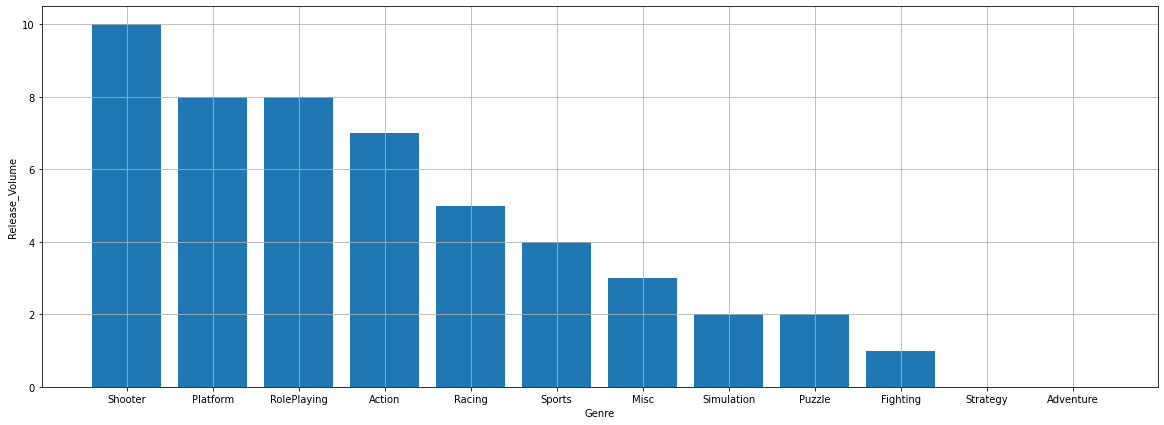

In [87]:
Release_Volume = [10,8,8,7,5,4,3,2,2,1,0,0]                         

plt.rcParams['axes.grid'] = True 
plt.figure(figsize=(20, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['Shooter','Platform','RolePlaying','Action','Racing','Sports','Misc','Simulation','Puzzle','Fighting','Strategy','Adventure'])
plt.xlabel('Genre')
plt.ylabel('Release_Volume')
plt.bar(range(len(Release_Volume)),Release_Volume)

<BarContainer object of 4 artists>

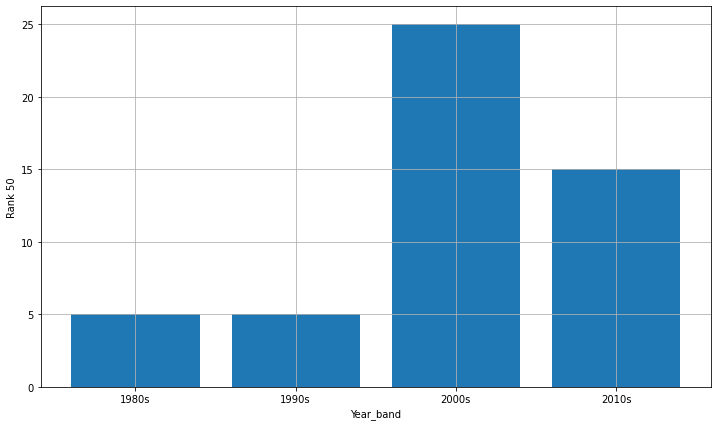

In [88]:
Year_band = [5, 5, 25, 15]

plt.rcParams['axes.grid'] = True                          
plt.figure(figsize=(12, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['1980s','1990s','2000s','2010s'])
plt.xlabel('Year_band')
plt.ylabel('Rank 50')
plt.bar(range(len(Year_band)),Year_band)


In [39]:
total_df2 = pd.crosstab(total_df1.Year_band, total_df1.Publisher, margins=True)
total_df2

total_df3 = total_df2.reindex(index=['팔십년대','구십년대', '이천년대','이천십년대', 'All'])
total_df3

Publisher,Activision,Microsoft Game Studios,Nintendo,Sony Computer Entertainment,Take-Two Interactive,All
Year_band,,,,,,
팔십년대,0,0,5,0,0,5
구십년대,0,0,5,0,0,5
이천년대,1,1,18,2,3,25
이천십년대,7,1,4,0,3,15
All,8,2,32,2,6,50


<BarContainer object of 5 artists>

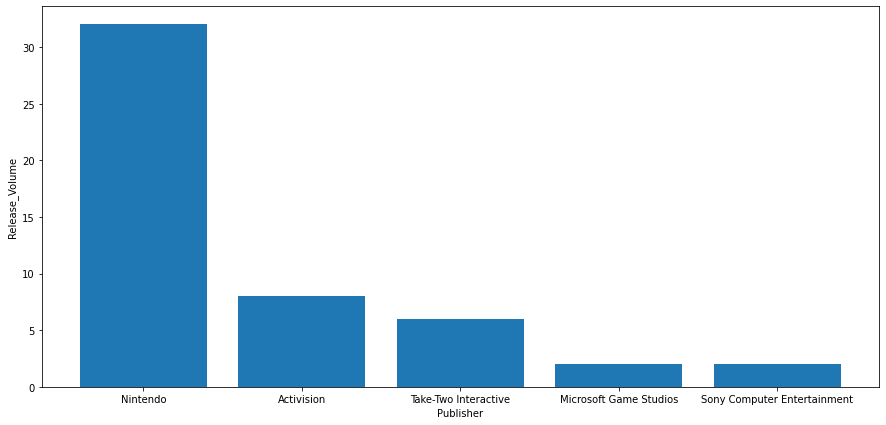

In [67]:
Release_Volume = [32,8,6,2,2]
                         
plt.figure(figsize=(15, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['Nintendo','Activision','Take-Two Interactive','Microsoft Game Studios','Sony Computer Entertainment'])
plt.xlabel('Publisher')
plt.ylabel('Release_Volume')
plt.bar(range(len(Release_Volume)),Release_Volume)


In [40]:
total_df2 = pd.crosstab(total_df1.Year_band, total_df1.Platform, margins=True)
total_df2

total_df3 = total_df2.reindex(index=['팔십년대','구십년대', '이천년대','이천십년대', 'All'])
total_df3

Platform,3DS,DS,GB,GBA,N64,NES,PS2,PS3,PS4,SNES,Wii,X360,All
Year_band,,,,,,,,,,,,,
팔십년대,0,0,2,0,0,3,0,0,0,0,0,0,5
구십년대,0,0,3,0,1,0,0,0,0,1,0,0,5
이천년대,0,8,0,1,0,0,5,0,0,0,9,2,25
이천십년대,3,1,0,0,0,0,0,4,2,0,0,5,15
All,3,9,5,1,1,3,5,4,2,1,9,7,50


<BarContainer object of 12 artists>

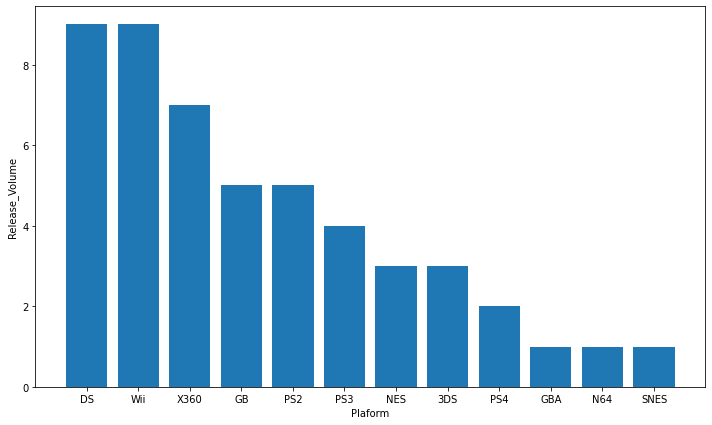

In [65]:
Release_Volume = [9, 9, 7, 5, 5, 4, 3, 3, 2, 1, 1, 1]
                         
plt.figure(figsize=(12, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['DS','Wii','X360','GB','PS2','PS3','NES','3DS','PS4','GBA','N64','SNES'])
plt.xlabel('Plaform')
plt.ylabel('Release_Volume')
plt.bar(range(len(Release_Volume)),Release_Volume)


In [41]:
# 상위 50개의 지역별 출고량

NA_SalesT = total_df1['NA_Sales'].sum()
print(NA_SalesT)

EU_SalesT = total_df1['EU_Sales'].sum()
print(EU_SalesT)

JP_SalesT = total_df1['JP_Sales'].sum()
print(JP_SalesT)

Other_SalesT = total_df1['Other_Sales'].sum()
print(Other_SalesT)

491.49000000000007
284.41999999999996
140.54
94.71000000000001


<BarContainer object of 4 artists>

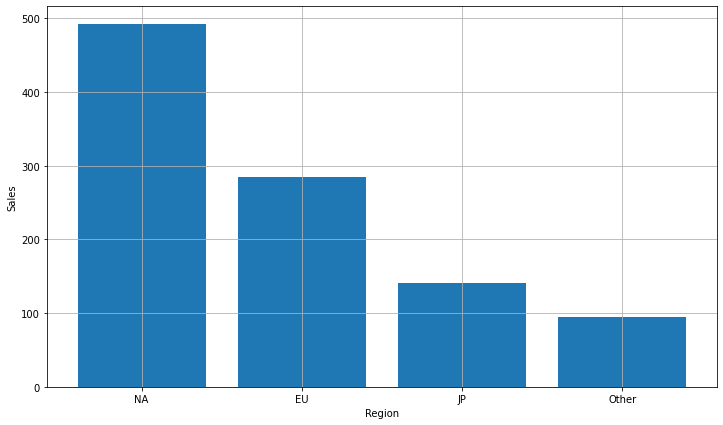

In [130]:
Sales = [491.49, 284.42, 140.54, 94.71]
                         
plt.figure(figsize=(12, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['NA','EU','JP','Other'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.bar(range(len(Sales)),Sales)


<BarContainer object of 4 artists>

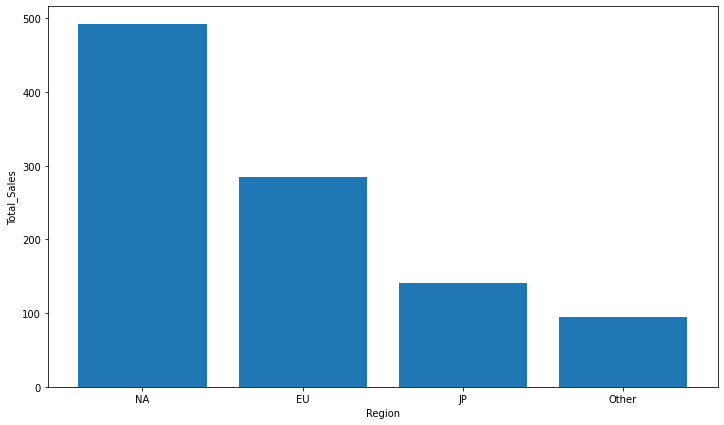

In [46]:
Total_Sales = [491.49, 284.42, 140.54, 94.71]
                         
plt.figure(figsize=(12, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['NA','EU','JP','Other'])
plt.xlabel('Region')
plt.ylabel('Total_Sales')
plt.bar(range(len(Total_Sales)),Total_Sales)


In [78]:
#total_df.iloc[:51]
total_df1 = total_df.iloc[0:50]
total_df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,이천년대,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,팔십년대,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,이천년대,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,이천년대,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,RolePlaying,Nintendo,11.27,8.89,10.22,1.00,구십년대,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,팔십년대,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,이천년대,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,이천년대,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,이천년대,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,팔십년대,28.31


In [79]:
Action = total_df1['Genre'] == 'Action'
total_df1 = total_df1[Action]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

111.72


In [82]:
Adventure = total_df1['Genre'] == 'Adventure'
total_df1 = total_df1[Adventure]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

0.0


In [90]:

total_df1 = total_df.iloc[0:50]
total_df1

Misc = total_df1['Genre'] == 'Misc'
total_df1 = total_df1[Misc]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

71.05


In [91]:

total_df1 = total_df.iloc[0:50]
total_df1


Platform = total_df1['Genre'] == 'Platform'
total_df1 = total_df1[Platform]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

178.32


In [92]:

total_df1 = total_df.iloc[0:50]
total_df1


Sports = total_df1['Genre'] == 'Sports'
total_df1 = total_df1[Sports]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

160.46


In [94]:

total_df1 = total_df.iloc[0:50]
total_df1


Simulation = total_df1['Genre'] == 'Simulation'
total_df1 = total_df1[Simulation]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

37.03


In [96]:

total_df1 = total_df.iloc[0:50]
total_df1


Racing = total_df1['Genre'] == 'Racing'
total_df1 = total_df1[Racing]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

98.09


In [98]:

total_df1 = total_df.iloc[0:50]
total_df1

RolePlaying = total_df1['Genre'] == 'RolePlaying'
total_df1 = total_df1[RolePlaying]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

144.3


In [99]:

total_df1 = total_df.iloc[0:50]
total_df1

Puzzle = total_df1['Genre'] == 'Puzzle'
total_df1 = total_df1[Puzzle]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

45.56


In [100]:

total_df1 = total_df.iloc[0:50]
total_df1


Strategy = total_df1['Genre'] == 'Strategy'
total_df1 = total_df1[Strategy]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

0.0


In [101]:

total_df1 = total_df.iloc[0:50]
total_df1


Fighting = total_df1['Genre'] == 'Fighting'
total_df1 = total_df1[Fighting]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

13.04


In [102]:

total_df1 = total_df.iloc[0:50]
total_df1


Shooter = total_df1['Genre'] == 'Shooter'
total_df1 = total_df1[Shooter]
total_df1

Total_Sales1 = total_df1['Total_Sales'].sum()
print(Total_Sales1)

151.58999999999997


In [103]:
total_region_df = pd.DataFrame({'Genre':['Platform','Sports','Shooter','RolePlaying','Action','Racing','Misc','Puzzle','Simulation','Fighting','Adventure','Strategy'], 
                          'Total_Sales':['178.32',	'160.46',	'151.59',	'144.3',	'111.72',	'98.09',	'71.05',	'45.56',	'37.03',	'13.04',	'0',	'0'],
                          })
total_region_df

,Genre,Total_Sales
0,Platform,178.32
1,Sports,160.46
2,Shooter,151.59
3,RolePlaying,144.3
4,Action,111.72
5,Racing,98.09
6,Misc,71.05
7,Puzzle,45.56
8,Simulation,37.03
9,Fighting,13.04


<BarContainer object of 12 artists>

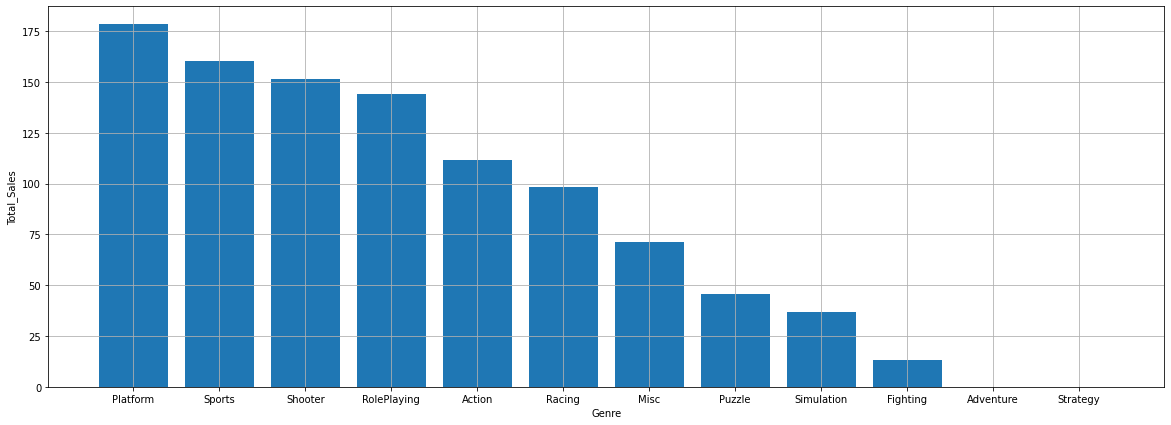

In [106]:
Total_Sales = [178.32,160.46,	151.59,	144.3,111.72,	98.09,71.05,45.56,37.03,13.04,0,0]                     

plt.rcParams['axes.grid'] = True 
plt.figure(figsize=(20, 7))

ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
#ax.set_xticklabels([Action,Adventure,Misc,Platform,Sports,Simulation,Racing,RolePlaying,Puzzle,Strategy,Fighting,Shooter])
ax.set_xticklabels(['Platform','Sports','Shooter','RolePlaying','Action','Racing','Misc','Puzzle','Simulation','Fighting','Adventure','Strategy'])
plt.xlabel('Genre')
plt.ylabel('Total_Sales')
plt.bar(range(len(Total_Sales)),Total_Sales)